In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, LSTM, Dropout, Concatenate, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import time
seed_value= 644

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [ ]:
# Upload the train file from your local drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


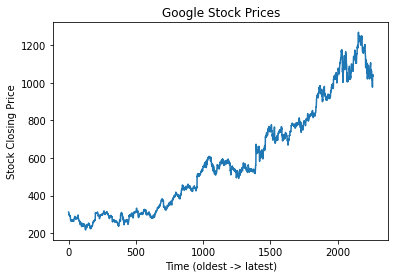

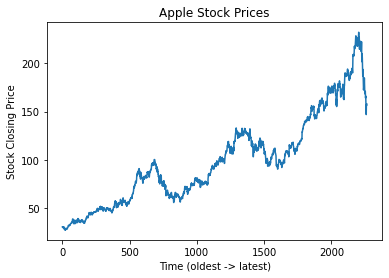

In [ ]:
df_google = pd.read_csv("/content/drive/MyDrive/Deep_MP2_Q1/GOOG.csv",sep="\t")
df_apple = pd.read_csv("/content/drive/MyDrive/Deep_MP2_Q1/AAPL.csv",sep="\t")
plt.plot(df_google['Close'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Closing Price")
plt.show()

plt.plot(df_apple['Close'])
plt.title("Apple Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Closing Price")
plt.show()

In [ ]:
goog = df_google[['High', 'Low', 'Open', 'Volume','Close','Adj Close']].to_numpy()
aapl = df_apple[['High', 'Low', 'Open', 'Volume','Close','Adj Close']].to_numpy()
from sklearn import preprocessing

# MinMax
scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 1))
traaain = np.concatenate((goog,aapl),axis=1)
goog = scaler.fit_transform(goog)
aapl = scaler.fit_transform(aapl)
traaain = scaler.fit_transform(traaain)


In [ ]:
def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
    data_list1 = np.array(data_list1)
    # np.random.shuffle(data_list1)
    return data_list1

In [ ]:
period = 30
data_list_goog = data_for_training(goog, period)
data_list_aapl = data_for_training(aapl, period)
data_train = data_for_training(traaain,30)

target_list_goog = np.zeros((len(data_list_goog), 1))
for i in range(len(data_list_goog)):
    value = data_list_goog[i][29][4]
    target_list_goog[i][0] = value

target_list_aapl = np.zeros((len(data_list_aapl), 1))
for i in range(len(data_list_aapl)):
    value = data_list_aapl[i][29][4]
    target_list_aapl[i][0] = value

target_train = np.zeros((len(data_list_aapl), 2))
for i in range(len(data_list_aapl)):
    value1 = data_train[i][29][4]
    value2 = data_train[i][29][10]
    target_train[i][0] = value1
    target_train[i][1] = value2

print(data_list_goog.shape)
print(data_list_aapl.shape)
data_train = data_for_training(traaain,30)

(2235, 30, 6)
(2235, 30, 6)


# LSTM Model

In [ ]:
data_dim = 5
timesteps = 30
nb_classes = 2
model = Sequential()
model.add(LSTM(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(LSTM(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 52,866
Trainable params: 52,866
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_test_size = 0.1
ratio_train = int((1 - my_test_size) * len(data_list_goog))
X_train = data_train[:ratio_train]
y_train = target_train[:ratio_train]
X_test = data_train[ratio_train:]
y_test = target_train[ratio_train:]


In [ ]:
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")


Epoch 1/100
32/32 [==============================] - 6s 46ms/step - loss: 0.0900 - mae: 0.2098
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0875 - mae: 0.1915
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0873 - mae: 0.1887
Epoch 4/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0873 - mae: 0.1884
Epoch 5/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0873 - mae: 0.1884
Epoch 6/100
32/32 [==============================] - 1s 47ms/step - loss: 0.0873 - mae: 0.1887
Epoch 7/100
32/32 [==============================] - 2s 48ms/step - loss: 0.0873 - mae: 0.1882
Epoch 8/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0873 - mae: 0.1882
Epoch 9/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0873 - mae: 0.1880
Epoch 10/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0873 - mae: 0.1879
Epoch 11/100
32/32 [=============================

7/7 [==============================] - 1s 11ms/step - loss: 1.8120e-04 - mae: 0.0104
train loss: 3.83375991077628e-05, train mae: 0.004520136397331953
test loss: 0.00018120296590495855, test mae: 0.010387795977294445


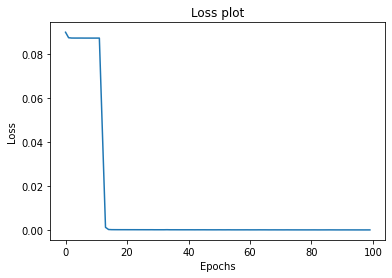

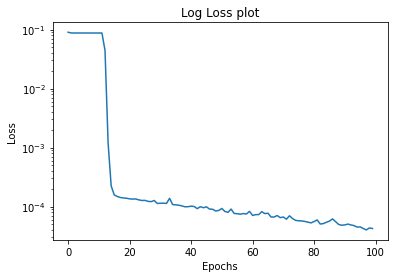

In [ ]:
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
def inv_transform(scaler,data):
    ttest = np.zeros((len(data),12))
    ttest[:,10]=data[:,1]
    ttest[:,4]=data[:,0]
    return scaler.inverse_transform(ttest)
zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)


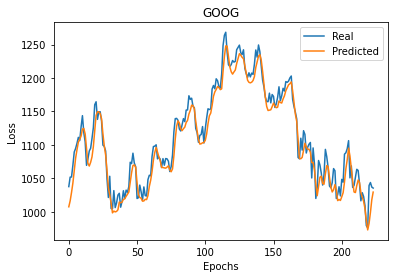

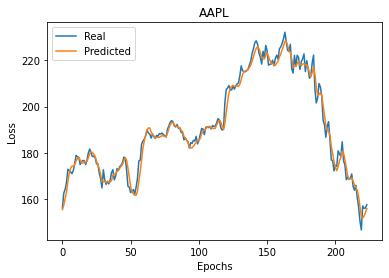

In [ ]:
plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# RNN Model


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 64)            4928      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 13,314
Trainable params: 13,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 0.0209 - mae: 0.1002
Epoch 2/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0011 - mae: 0.0248
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 3.4371e-04 - mae: 0.0137
Epoch 4/100
32/32 [======

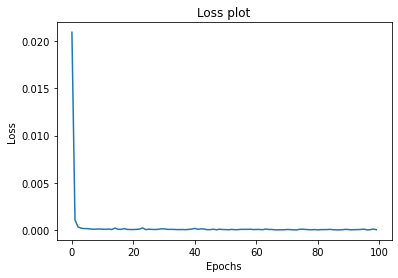

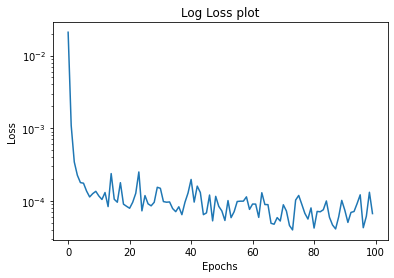

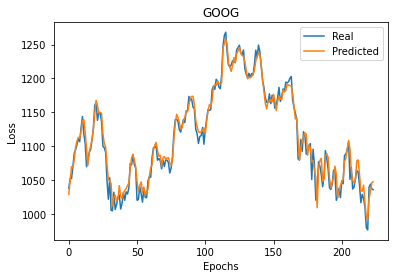

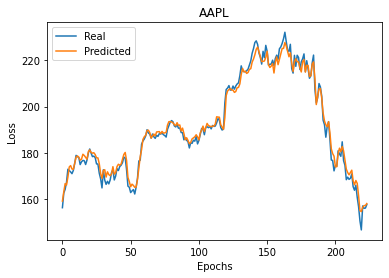

In [ ]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(SimpleRNN(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# GRU Model


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 64)            14976     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 40,066
Trainable params: 40,066
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 5s 41ms/step - loss: 0.0916 - mae: 0.2296
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0838 - mae: 0.1960
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0836 - mae: 0.1923
Epoch 4/100
32/32 [==========

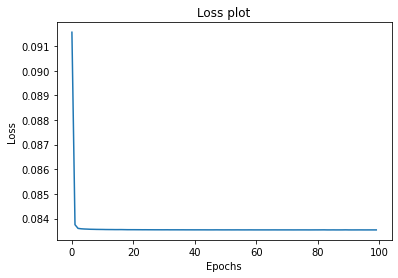

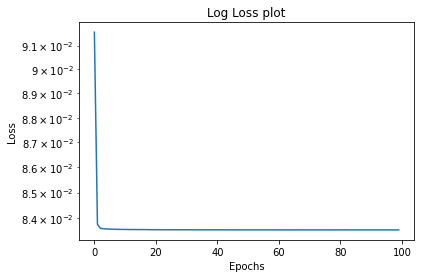

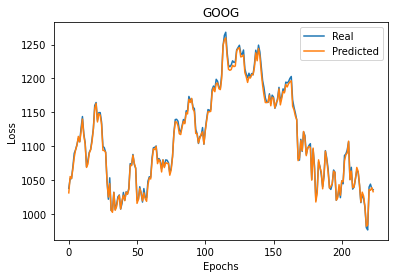

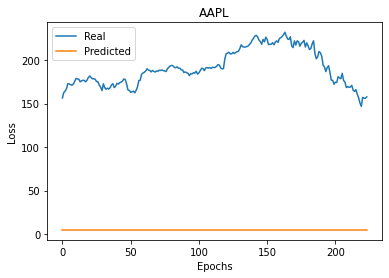

In [ ]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(GRU(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(GRU(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()


# MAPE GRU


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 30, 64)            14976     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 40,066
Trainable params: 40,066
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 5s 41ms/step - loss: 58.4660 - mae: 0.2169
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 51.5783 - mae: 0.1931
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 51.1362 - mae: 0.1917
Epoch 4/100
32/32 [=======

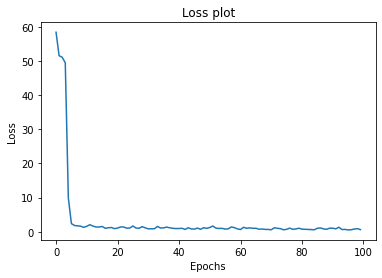

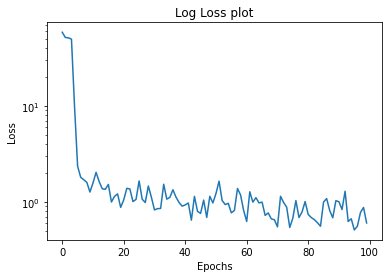

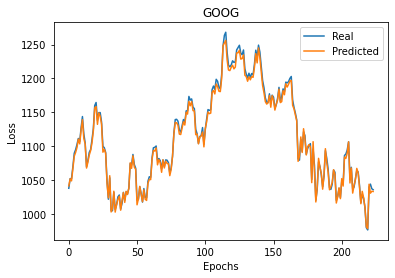

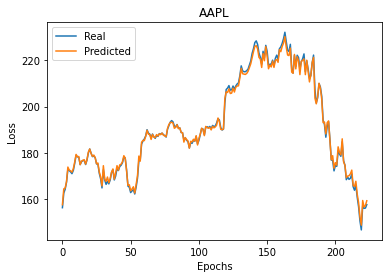

In [ ]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(GRU(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(GRU(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mape',
                optimizer='adam',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()


# MAPE RNN


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30, 64)            4928      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 13,314
Trainable params: 13,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 65.1525 - mae: 0.2274
Epoch 2/100
32/32 [==============================] - 1s 18ms/step - loss: 57.0287 - mae: 0.2073
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 57.0564 - mae: 0.2074
Epoch 4/100
32/32 [=======

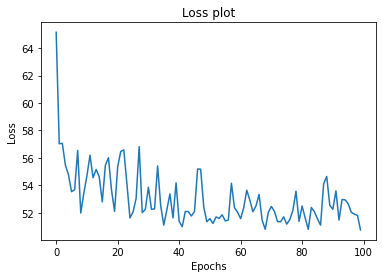

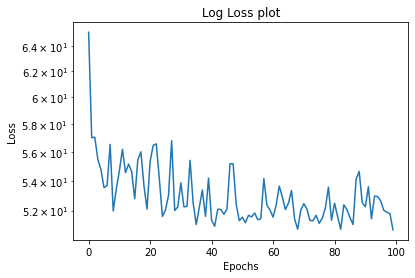

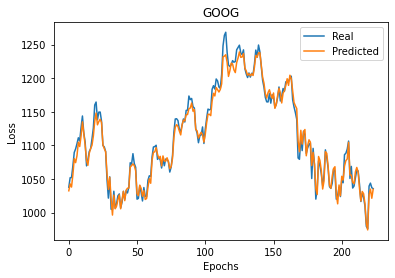

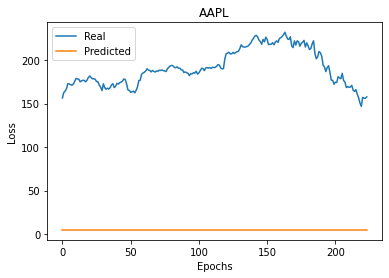

In [ ]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(SimpleRNN(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mape',
                optimizer='adam',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# MAPE LSTM

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 64)            19712     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 52,866
Trainable params: 52,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 5s 46ms/step - loss: 21.0477 - mae: 0.0755
Epoch 2/100
32/32 [==============================] - 2s 47ms/step - loss: 4.2585 - mae: 0.0144
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 3.3386 - mae: 0.0112
Epoch 4/100
32/32 [=========

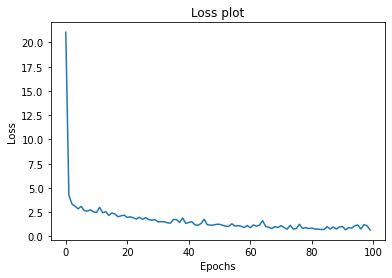

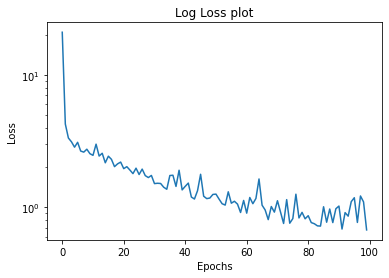

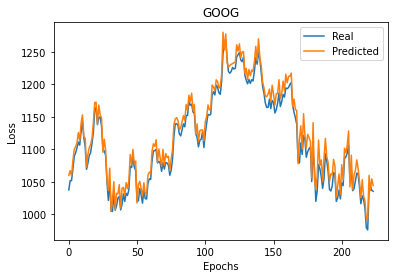

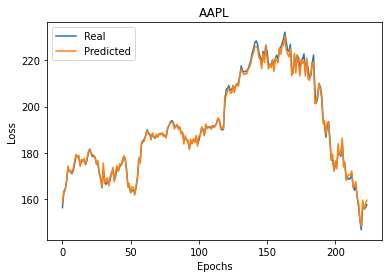

In [ ]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(LSTM(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mape',
                optimizer='adam',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# Adagrad LSTM


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            19712     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 2)                 130       
                                                                 
Total params: 52,866
Trainable params: 52,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 5s 45ms/step - loss: 0.1136 - mae: 0.2929
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0914 - mae: 0.2347
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0869 - mae: 0.2194
Epoch 4/100
32/32 [==========

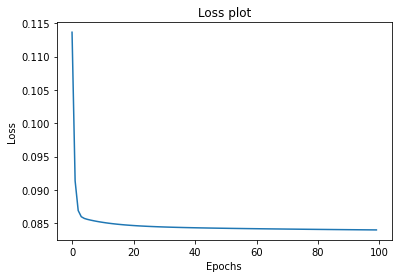

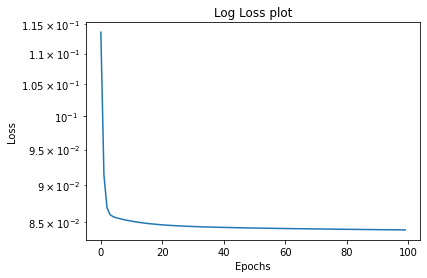

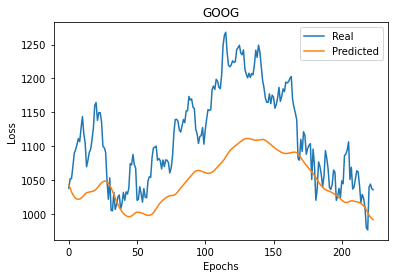

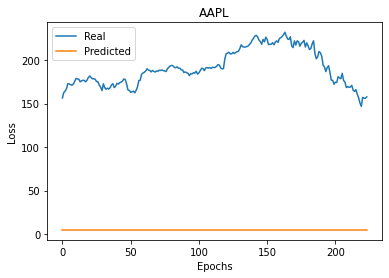

In [ ]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(LSTM(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='Adagrad',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# RMSprop LSTM

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            19712     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 52,866
Trainable params: 52,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 5s 47ms/step - loss: 0.0093 - mae: 0.0615
Epoch 2/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0029 - mae: 0.0443
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.0022 - mae: 0.0352
Epoch 4/100
32/32 [==========

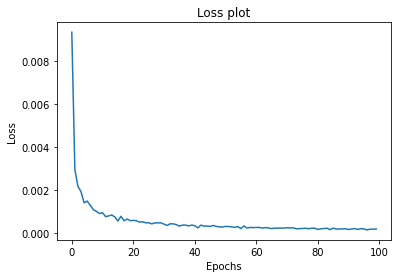

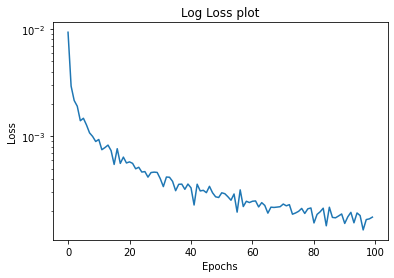

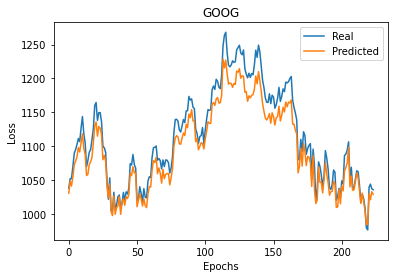

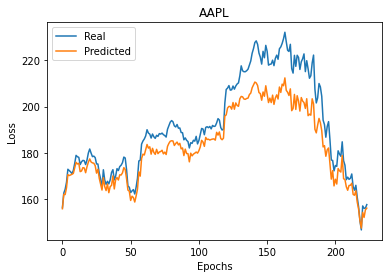

In [ ]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(LSTM(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# Adagrad RNN

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 30, 64)            4928      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 13,314
Trainable params: 13,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 0.0620 - mae: 0.1705
Epoch 2/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0143 - mae: 0.0834
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.0085 - mae: 0.0683
Epoch 4/100
32/32 [==========

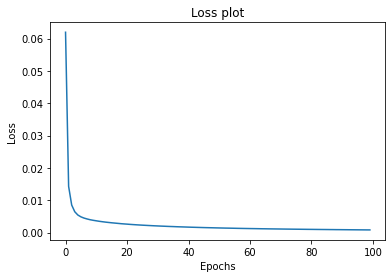

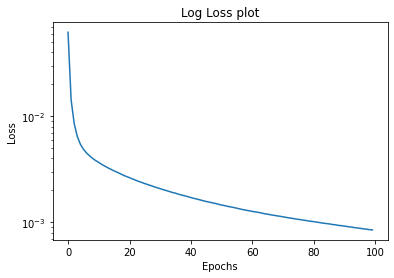

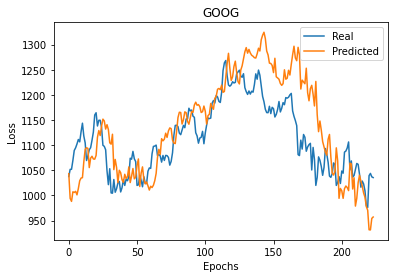

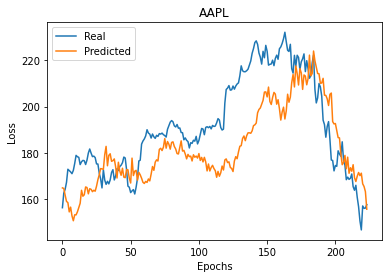

In [ ]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(SimpleRNN(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='Adagrad',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# RMSprop RNN

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 30, 64)            4928      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 13,314
Trainable params: 13,314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 0.1729 - mae: 0.3728
Epoch 2/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1708 - mae: 0.3715
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 0.1708 - mae: 0.3715
Epoch 4/100
32/32 [==========

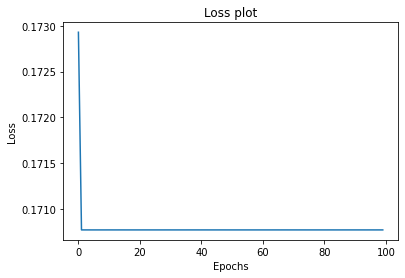

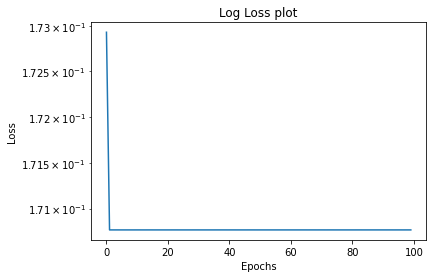

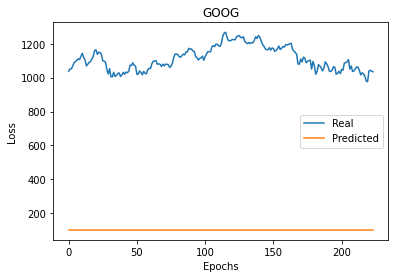

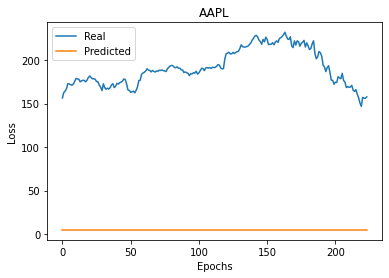

In [ ]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(SimpleRNN(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# Adagrad GRU

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 30, 64)            14976     
                                                                 
 gru_5 (GRU)                 (None, 64)                24960     
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 40,066
Trainable params: 40,066
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 6s 41ms/step - loss: 0.1271 - mae: 0.3036
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 0.1005 - mae: 0.2476
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0929 - mae: 0.2256
Epoch 4/100
32/32 [=========

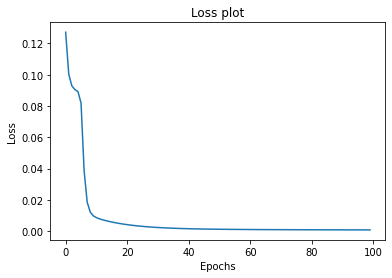

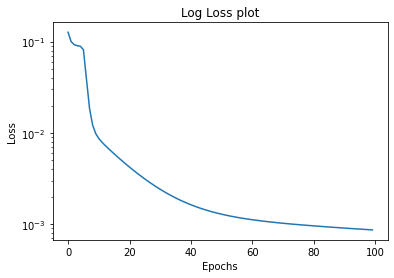

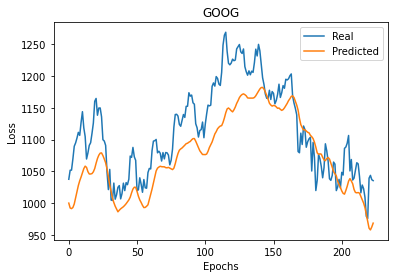

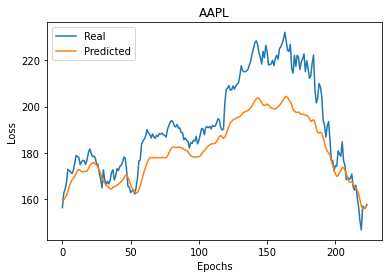

In [ ]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(GRU(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(GRU(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='Adagrad',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()


# **RMSprop** GRU

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 30, 64)            14976     
                                                                 
 gru_7 (GRU)                 (None, 64)                24960     
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 40,066
Trainable params: 40,066
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 6s 41ms/step - loss: 0.0114 - mae: 0.0679
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 0.0030 - mae: 0.0410
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0024 - mae: 0.0372
Epoch 4/100
32/32 [=========

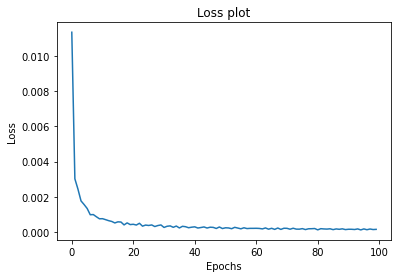

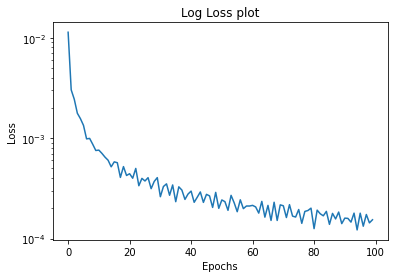

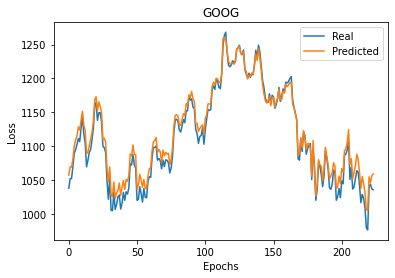

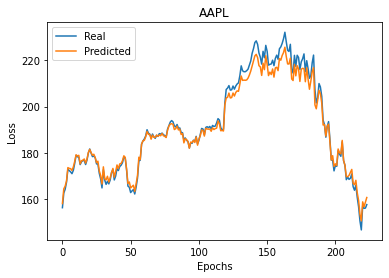

In [ ]:
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(GRU(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0))
model.add(GRU(64, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['mae'])

model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# LSTM + 0.1 droput

Epoch 1/100
32/32 [==============================] - 7s 86ms/step - loss: 0.0166 - mae: 0.0871
Epoch 2/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0026 - mae: 0.0379
Epoch 3/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0014 - mae: 0.0278
Epoch 4/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0013 - mae: 0.0262
Epoch 5/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0012 - mae: 0.0254
Epoch 6/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0011 - mae: 0.0247
Epoch 7/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0011 - mae: 0.0247
Epoch 8/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0010 - mae: 0.0238
Epoch 9/100
32/32 [==============================] - 3s 85ms/step - loss: 9.9360e-04 - mae: 0.0231
Epoch 10/100
32/32 [==============================] - 3s 86ms/step - loss: 9.9866e-04 - mae: 0.0233
Epoch 11/100
32/32 [=====================

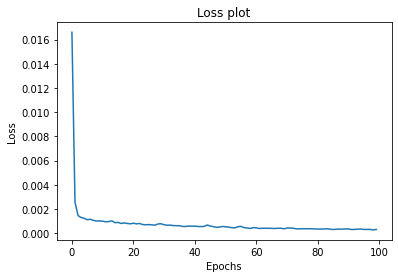

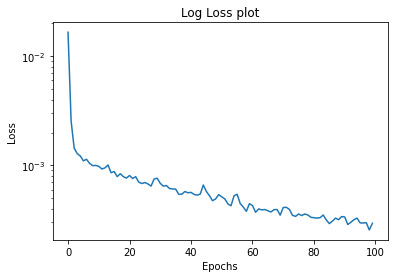

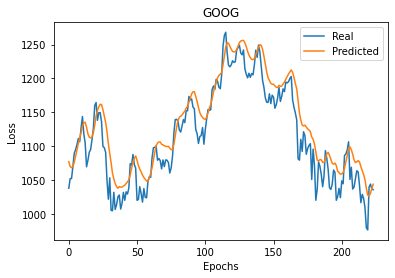

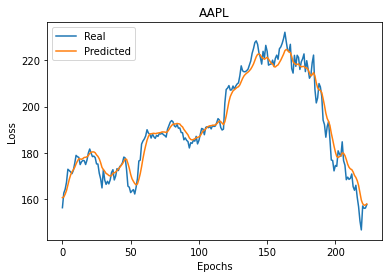

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import LambdaCallback

model = Sequential()
model.add(LSTM(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0.1))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, recurrent_dropout=0.1))
model.add(Dropout(0.1))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae'])

#model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

# RNN + 0.1 dropout


Epoch 1/100
32/32 [==============================] - 3s 28ms/step - loss: 0.1170 - mae: 0.2907
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0886 - mae: 0.2512
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0758 - mae: 0.2305
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0605 - mae: 0.2040
Epoch 5/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0464 - mae: 0.1773
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0321 - mae: 0.1454
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0231 - mae: 0.1220
Epoch 8/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0189 - mae: 0.1088
Epoch 9/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0136 - mae: 0.0913
Epoch 10/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0103 - mae: 0.0796
Epoch 11/100
32/32 [=============================

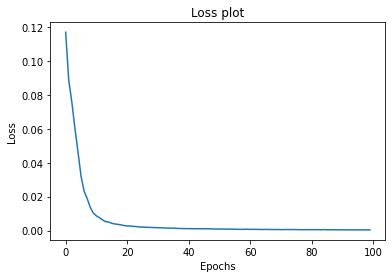

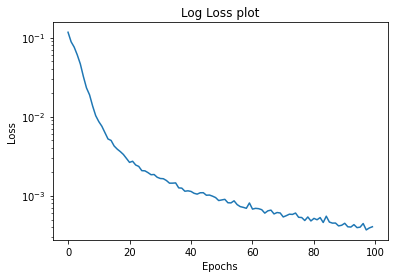

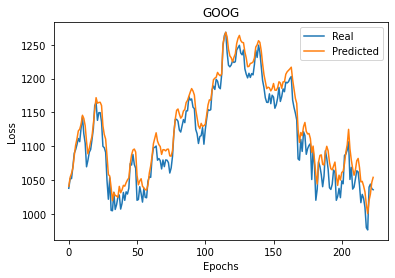

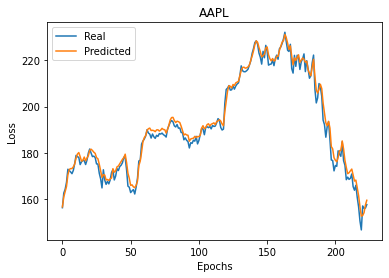

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.callbacks import LambdaCallback

model = Sequential()
model.add(SimpleRNN(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0.1))
model.add(Dropout(0.1))
model.add(SimpleRNN(64, return_sequences=False, recurrent_dropout=0.1))
model.add(Dropout(0.1))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae'])

#model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()


# GRU + 0.1 dropout


Epoch 1/100
32/32 [==============================] - 7s 79ms/step - loss: 0.0937 - mae: 0.2236
Epoch 2/100
32/32 [==============================] - 3s 78ms/step - loss: 0.0174 - mae: 0.0807
Epoch 3/100
32/32 [==============================] - 2s 77ms/step - loss: 0.0019 - mae: 0.0327
Epoch 4/100
32/32 [==============================] - 2s 75ms/step - loss: 0.0015 - mae: 0.0286
Epoch 5/100
32/32 [==============================] - 2s 77ms/step - loss: 0.0013 - mae: 0.0269
Epoch 6/100
32/32 [==============================] - 2s 77ms/step - loss: 0.0012 - mae: 0.0256
Epoch 7/100
32/32 [==============================] - 2s 77ms/step - loss: 0.0012 - mae: 0.0253
Epoch 8/100
32/32 [==============================] - 2s 77ms/step - loss: 0.0011 - mae: 0.0242
Epoch 9/100
32/32 [==============================] - 2s 76ms/step - loss: 0.0010 - mae: 0.0236
Epoch 10/100
32/32 [==============================] - 2s 76ms/step - loss: 9.3571e-04 - mae: 0.0226
Epoch 11/100
32/32 [=========================

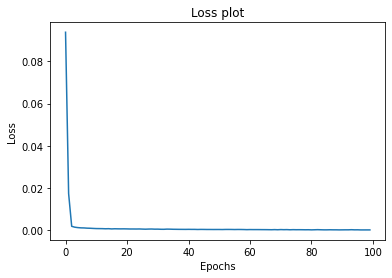

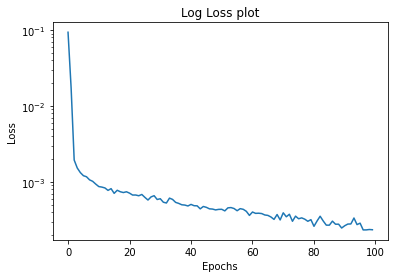

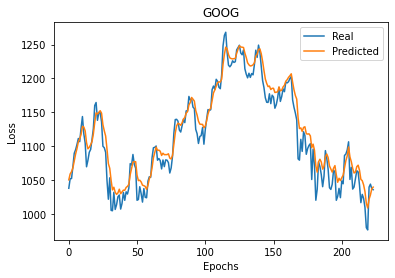

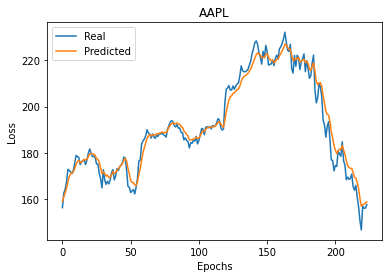

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import LambdaCallback

model = Sequential()
model.add(GRU(64, batch_input_shape=(None, 30, 12), return_sequences=True, recurrent_dropout=0.1))
model.add(Dropout(0.1))
model.add(GRU(64, return_sequences=False, recurrent_dropout=0.1))
model.add(Dropout(0.1))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae'])

#model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,
            batch_size=64, epochs=100,
            )
print("Total training time:", (time.time() - start_time),"seconds")
z=model.predict(X_test)
results_train = model.evaluate(X_train, y_train)
results_test = model.evaluate(X_test, y_test)

print('train loss: {}, train mae: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test mae: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Log Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

zz = inv_transform(scaler,y_test)
scaled_results = inv_transform(scaler,z)

plt.plot(zz[:,4])
plt.plot(scaled_results[:,4])
plt.title('GOOG')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()

plt.plot(zz[:,10])
plt.plot(scaled_results[:,10])
plt.title('AAPL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Real","Predicted"])
plt.show()